<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>

### Exploratory Data Analysis - Shikha Gupta,PhD

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
    - 2.1 [Importing packages](#section201)<br/>
    - 2.2 [Reading the csv](#section202)<br/>
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Initial Observations](#section303)<br/>
4. [Exploratory Data Analysis](#section4)</br>
    - 4.1 [Segmenting data based on Status into two categories: Alive for >=5 years, Dead with in 5 years](#section401)<br/>
    - 4.2 [Analysis based on Positive Axillary Nodes data](#section402)<br/>
        - 4.2.1 [Understanding distribution of Positive axillary nodes in the data](#section40201)<br/>
        - 4.2.2 [Segmenting data based on Pos_axillary_nodes into three categories: 0, 1-5 and >5](#section40202)<br/>
        - 4.2.3 [Positive Axillary Nodes vs Status Group](#section40203)<br/>
        - 4.2.4 [Positive Axillary Nodes vs Status Group (Subplots to calculate the percentage of surviving patients  ](#section40204)<br/>
        - 4.2.5 [Correlation analysis for Positive Axillary Nodes and 5-year Survival Status](#section40205)<br/>
    - 4.3 [Analysis based on Age of patients](#section403)<br/>
        - 4.3.1 [Understanding distribution of Patients' Age in the data](#section40301)<br/>
        - 4.3.2 [Segmenting data based on Age into three categories: 30-40,41-55 and >55](#section40302)<br/>
        - 4.3.3 [Age vs Status](#section40303)<br/>
        - 4.3.4 [Age vs Status (Subplots to calculate the percentage of surviving patients)](#section40304)<br/>
        - 4.3.5 [Correlation analysis for Age and Survival Status](#section40305)<br/>
        - 4.3.6 [Re analysis based on segementation of data based on Age in two categories : 30-40, >40](#section40306)<br/>
    - 4.4 [Analysis based on Years of Operation](#section404)<br/>
        - 4.4.1 [Understanding distribution of Years of Operation in the data](#section40401)<br/>
        - 4.4.2 [Segmenting data based on Yeats of Operation into three categories: 1958-1960,1961-65 and >1965](#section40402)<br/>
        - 4.4.3 [Years of Operation vs 5-year Survival Status](#section40403)<br/>
        - 4.4.4 [Years of Operation vs 5-year Survival Status -Subplots to calculate the percentage of surviving patients](#section40404)<br/>
        - 4.4.5 [Correlation analysis for Years of Operation and Survival Status](#section40405)<br/>
    - 4.5 [Pair Plot](#section405)<br/>
        - 4.5.1 [Re analysis based on insights from the Pair Plot](#section40501)<br/>
   
5. [Questions](#section5)
    - 5.1  [With in the same age group what is distribution of number of positive nodes and how does it affect the 5-year survival rate in different age groups? ](#section501)<br/>
    - 5.2  [With in the same node group, what is the distribution of age and does it lead to the difference in the 5-year survival rate between the different nodes groups?](#section502)<br/>
    - 5.3  [Is the higher 5-year death rate for patients operated between 1963-65 due to a higher number of positive axillary nodes in that group of patients and/or due to higher number of older patients?](#section503)<br/>
6. [Conclusions](#section6)<br/>  
    - 6.1  [Actionable Insights](#section601)<br/>

<a id=section1></a>
## 1. Problem Statement

This notebook explores the Breast Cancer 5- year survival dataset and will use __Pandas__ to perform  __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.


<br id=section2></br>
## 2. Data Loading and Description

- The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
- The dataset consists of the information about breast cancer and suriviving patients. Various variables present in the dataset includes data of age, 5-year survival status, year of operation and number of positive axillary nodes. 
- The dataset comprises of __306 observations of 4 columns__. Below is a table showing names of all the columns and their description.

|Column name        | Description                                |
|------------------:|-----------------------------:              |
|Age	            | Age of the patient at the time of operation|
|Years_of_operation | Year of operation-1900                     |
|Pos_axillary_nodes	| Number of positive axillary nodes detected |
|Status	            | Survival status                            |
|                   |  1 = the patient survived 5 years or longer|
|                   |  2 = the patient died within 5 year        |


### 2.1 Importing packages<br id=section201></br>

In [3]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

### 2.2 Reading the CSV file <br id=section202></br>

In [4]:
breast_cancer = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv")     # Importing  dataset using pd.read_csv

## 3. Data Profiling <br id=section3></br>

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the data <br id=section301></br>

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [5]:
breast_cancer.shape

(306, 4)

In [6]:
breast_cancer.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
breast_cancer.tail()

,Age,Years_of_operation,Pos_axillary_nodes,Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [8]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
breast_cancer.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


From the above we can see that the data is relatively clean with no missing values. The Pos_axillary nodes has a mean of 4 but the max value of 52 which is very high compared to the 75%ile as well as the mean. 

### 3.2 Pre Profiling <br id=section302></br>

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
profile = pandas_profiling.ProfileReport(breast_cancer)
profile.to_file("breastcancer_before_preprocessing.html")

### 3.3 Initial Observations (based on Pandas Profiling) <br id=section303></br>
1. There are 4 variables in this data set - all numerical.
2. There are no missing values in the data set.
3. <strong>'Status'</strong>: - which describes the sutvival status of patients, is numerical but categorical. Also, values of 1 and 2 are more confusing, would be better to change them to Alive and Dead in a separate column.
4. <strong>'Positive_axillary_nodes'</strong> : 
    -44% patients had zero positive axillary nodes - hence, would be interesting to analyse their survival status.
    -75% patients have only 4 or less postive axillary nodes but the maximum value is 52, hence the data is right skewed with median of 1 and mean of 4.  The mean is still relatively close to the medain since, 44% of data is zero - needs further analysis to understand the data in more detail.
5. <strong>'Age'</strong>: Age of the patients vary from 30 years to 83 years with a mean age of 52 years. The data is in a reasonable range and does not need any cleaning up - would be important to analyse the relationshp between age and survival status of patients.
6. Both <strong>'Positive_axillary_nodes'</strong> and <strong>'Age'</strong> will need to be segmented to identify patterns.
7. <strong>'Year of Operation'</strong>: Year of operation seems to be irrelevant for the analysis based on the correlation data.


## 4.0 Exploratory Data Analysis <br id=section4></br>

The following analysis will focus on understanding the various parameters of the data and will explore the realtionships between them to maximise the insights from the data.  The insights will lead to conclusions based on the significance of the analysed paramenters as wells as actionable insights. 

### 4.1 Segmenting Status into two categories based on survival status : 'Alive for >= 5 years', 'Dead with in 5 years' <br id=section401></br>

In [11]:
breast_cancer['Status_Group'] = pd.cut(breast_cancer['Status'],
                         [0,1,2],
                         labels=['Alive for >=5 years','Dead with in 5 years'],include_lowest=False)

In [12]:
breast_cancer.head(10)

,Age,Years_of_operation,Pos_axillary_nodes,Status,Status_Group
0,30,64,1,1,Alive for >=5 years
1,30,62,3,1,Alive for >=5 years
2,30,65,0,1,Alive for >=5 years
3,31,59,2,1,Alive for >=5 years
4,31,65,4,1,Alive for >=5 years
5,33,58,10,1,Alive for >=5 years
6,33,60,0,1,Alive for >=5 years
7,34,59,0,2,Dead with in 5 years
8,34,66,9,2,Dead with in 5 years
9,34,58,30,1,Alive for >=5 years


### 4.2 Analysis based on Positive Axillary Nodes data   <br id=section402></br>
Background: Positive Axillary nodes in breast cancer represents the spread of disease. The number represents the number of lymph nodes which are found have cancer cells outside of breast area.

### 4.2.1 Understanding distribution of Positive axillary nodes in the data<br id=section40201></br>

In [13]:
max_rows_pos52=breast_cancer.apply(lambda x: True if x['Pos_axillary_nodes'] == 52  else False , axis=1)

In [14]:
len(max_rows_pos52[max_rows_pos52 == True].index)

1

#### The above analysis tell us that the there is only one row with a maximum value of 52 for column Pos_axillary_nodes, which at this point is hard to figure out if it is an outlier or not.  To decide that, we need to understand the data in more detail. The next thing that we need to know as to how many rows have values greater than 4 (75% point) and perhaps how many rows have values greater than 10.

In [15]:
max_rows_pos4=breast_cancer.apply(lambda x: True if x['Pos_axillary_nodes'] < 5  else False , axis=1)

In [16]:
len(max_rows_pos4[max_rows_pos4 == True].index)

230

In [17]:
max_rows_pos10=breast_cancer.apply(lambda x: True if x['Pos_axillary_nodes'] >= 10  else False , axis=1)

In [18]:
len(max_rows_pos10[max_rows_pos10 == True].index)

43

In [19]:
max_rows_pos20=breast_cancer.apply(lambda x: True if x['Pos_axillary_nodes'] > 20  else False, axis=1)

In [20]:
len(max_rows_pos20[max_rows_pos20 == True].index)

14

### Distribution profile of Positive Axillary Nodes

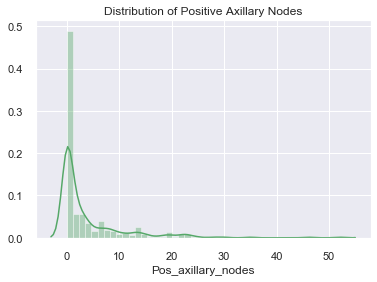

In [21]:
sns.distplot(breast_cancer['Pos_axillary_nodes'], color ='g')
plt.title('Distribution of Positive Axillary Nodes')
plt.show()

#### Observation: The above analysis tell us that the there are 136 rows with zero postive axillary nodes, 76 rows with more than 4 postive axillary nodes, 40 rows with more than 10 positive axillary nodes and 14 rows with more than 20 axillary node and only one row with 52 (maximum value)positive axillary nodes.

### 4.2.2 Segmenting data based on Pos_axillary_nodes <br id=section40202></br>

Based on the central tendency (Median and mean of 4 and mode of 0) as well as the distribution profile of Positive Axiallry nodes, it is important to break down the data in three groups - patients with 0 positive nodes, 1-5 positive nodes and >5 positive nodes, to help understand the realtionship of this parameter with the survival status of patients. 

In [22]:
#for i in range(5,0,-1):
    #breast_cancer.loc[breast_cancer['Pos_axillary_nodes'] <= i*10, 'Nodes_bin'] = i
    
    #for i in range(10,0,-1):
    #breast_cancer.loc[ breast_cancer['Pos_axillary_nodes'] <= i*5, 'Nodes_bin'] = i

In [23]:
#print(breast_cancer[['Pos_axillary_nodes','Nodes_bin']].groupby('Nodes_bin')['Pos_axillary_nodes'].count())

In [24]:
breast_cancer['Nodes_Group'] = pd.cut(breast_cancer['Pos_axillary_nodes'],
                         [0,0.5,5,99],
                         labels=['0','1-5','>5'],include_lowest=True)

In [25]:
breast_cancer['Nodes_Group2'] = pd.cut(breast_cancer['Pos_axillary_nodes'],
                         [0,10,99],
                         labels=['0-10','>10'],include_lowest=True)

In [26]:
breast_cancer.head(50)

,Age,Years_of_operation,Pos_axillary_nodes,Status,Status_Group,Nodes_Group,Nodes_Group2
0,30,64,1,1,Alive for >=5 years,1-5,0-10
1,30,62,3,1,Alive for >=5 years,1-5,0-10
2,30,65,0,1,Alive for >=5 years,0,0-10
3,31,59,2,1,Alive for >=5 years,1-5,0-10
4,31,65,4,1,Alive for >=5 years,1-5,0-10
5,33,58,10,1,Alive for >=5 years,>5,0-10
6,33,60,0,1,Alive for >=5 years,0,0-10
7,34,59,0,2,Dead with in 5 years,0,0-10
8,34,66,9,2,Dead with in 5 years,>5,0-10
9,34,58,30,1,Alive for >=5 years,>5,>10


### 4.2.3 Positive Axillary Nodes vs Status Group <br id=section40203></br>

Text(0.5, 1, 'Factor plot for Positive Axillary Nodes')

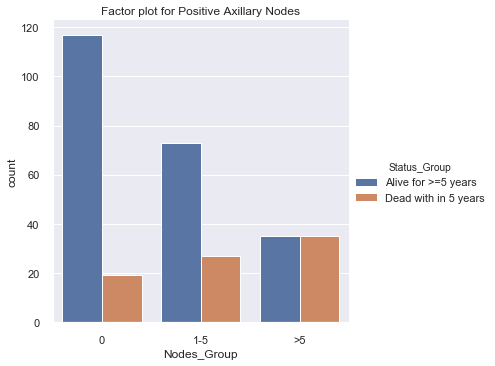

In [27]:
sns.catplot('Nodes_Group', hue='Status_Group', kind='count', data=breast_cancer);
plt.title('Factor plot for Positive Axillary Nodes')

<br id=section40204></br>
### 4.2.4 Positive Axillary Nodes vs Status Group - Subplots to calculate the percentage of surviving patients based on number of positive axillary nodes 

Text(0.5, 1.0, '>5 Positive Axillary Nodes')

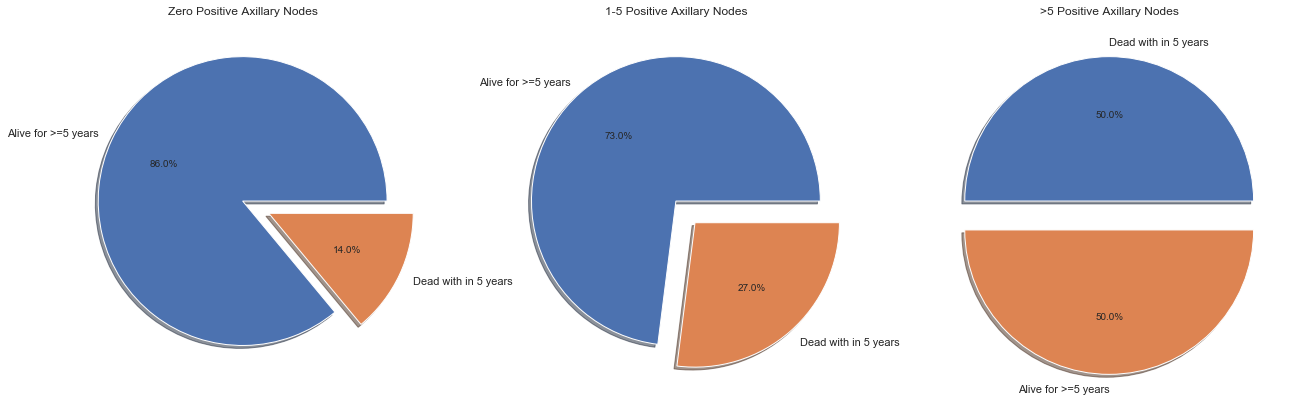

In [28]:
f,ax = plt.subplots(1,3,figsize=(22,7))
breast_cancer['Status_Group'][breast_cancer['Nodes_Group'] == '0'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Nodes_Group'] == '1-5'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Nodes_Group'] == '>5'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,label=" ")
ax[0].set_title('Zero Positive Axillary Nodes')
ax[1].set_title('1-5 Positive Axillary Nodes')
ax[2].set_title('>5 Positive Axillary Nodes')

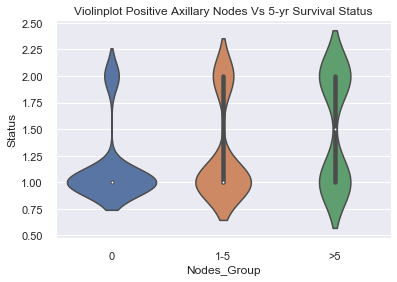

In [29]:
sns.violinplot('Nodes_Group','Status', kind='point', data = breast_cancer)
plt.title('Violinplot Positive Axillary Nodes Vs 5-yr Survival Status')
plt.show()

#### Observations:  The above analysis clearly shows that the patients with zero positive nodes have a 86% chance of survival which reduces to 73% for patients with 1-5 positive nodes. In patients with more than 5 positive nodes, survival reduces to 50% 

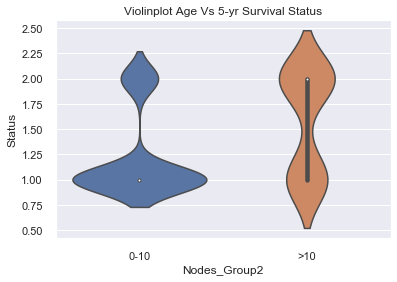

In [30]:
sns.violinplot('Nodes_Group2','Status', kind='point', data = breast_cancer)
plt.title('Violinplot Age Vs 5-yr Survival Status')
plt.show()

#### Observation : 57% of the patients with more than 10 positive axillary nodes did not survive beyond 5 years which is 2.5 times the death rate of patients with less than 10 positive axillary nodes (22%)

### 4.2.5 Correlation analysis for Positive axillary nodes and Survival status <br id=section40205></br>

In [31]:
df_nodes = pd.DataFrame({'Status': breast_cancer['Status'], 'Nodes': breast_cancer['Pos_axillary_nodes']})        
df_nodes.corr()
print("Pearson:",df_nodes.corr())

Pearson:           Status     Nodes
Status  1.000000  0.286768
Nodes   0.286768  1.000000


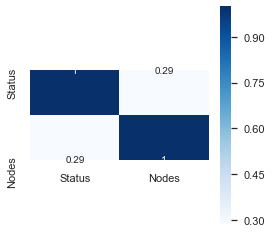

In [32]:
features = df_nodes.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

#### The above correlation is based on unsegmented data and shows a weak correlation between the number of positive axillary nodes and survival status of patients.

In [33]:
df_nodes2 = pd.DataFrame({'Status': breast_cancer['Status_Group'], 'Nodes': breast_cancer['Nodes_Group']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_nodes2_num = df_nodes2.apply(lambda x: x.cat.codes)

print("Pearson:", df_nodes2_num.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:           Status     Nodes
Status  1.000000  0.313189
Nodes   0.313189  1.000000



C:\Users\Shikha\AppData\Roaming\Python\Python37\site-packages\pandas\core\internals\blocks.py:610: FutureWarning: Constructing a CategoricalDtype without specifying `ordered` will default to `ordered=False` in a future version, which will cause the resulting categorical's `ordered` attribute to change to False; `ordered=True` must be explicitly passed in order to be retained
  return self.make_block(self.values.astype(dtype, copy=copy))


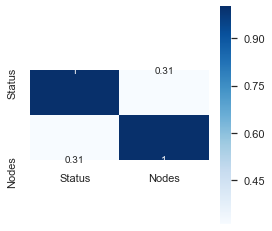

In [34]:
features = df_nodes2_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

#### Obersvation:  There is a weak correlation between number of positive axillary nodes and survival status of patients.  The correlation improves slightly when the data is segmented into three categories.

### 4.3 Analysis based on Age of Patients <br id=section403></br>

### 4.3.1 Understanding distribution of Age in the data <br id=section40301></br>

In [35]:
breast_cancer.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [36]:
max_rows_pos83=breast_cancer.apply(lambda x: True if x['Age'] == 83  else False , axis=1)

In [37]:
len(max_rows_pos83[max_rows_pos83 == True].index)

1

In [38]:
max_rows_pos30=breast_cancer.apply(lambda x: True if x['Age'] == 30  else False , axis=1)

In [39]:
len(max_rows_pos30[max_rows_pos30 == True].index)

3

In [40]:
max_rows_pos40=breast_cancer.apply(lambda x: True if x['Age'] > 40   else False , axis=1)

In [41]:
len(max_rows_pos40[max_rows_pos40 == True].index)

263

In [42]:
max_rows_pos50=breast_cancer.apply(lambda x: True if x['Age'] > 50   else False , axis=1)

In [43]:
len(max_rows_pos50[max_rows_pos50 == True].index)

170

In [44]:
max_rows_pos60=breast_cancer.apply(lambda x: True if x['Age'] > 60   else False , axis=1)

In [45]:
len(max_rows_pos60[max_rows_pos60 == True].index)

77

In [46]:
max_rows_pos70=breast_cancer.apply(lambda x: True if x['Age'] > 70   else False , axis=1)

In [47]:
len(max_rows_pos70[max_rows_pos70 == True].index)

14

In [48]:
max_rows_pos80=breast_cancer.apply(lambda x: True if x['Age'] > 80   else False , axis=1)

In [49]:
len(max_rows_pos80[max_rows_pos80 == True].index)

1

### Distribution profile of Age

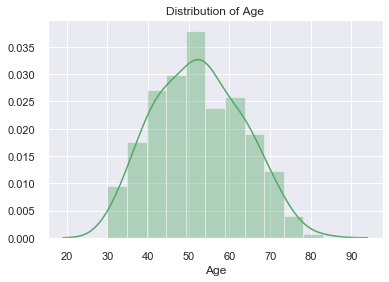

In [50]:
sns.distplot(breast_cancer['Age'], color ='g')
plt.title('Distribution of Age')
plt.show()

#### Observation:  From the above analysis it is evident that there are 136 patients below the age of 50 and rest 170 patients are above 50 years of age.  Mean and median for the population is 52 years. However, there is a group of 43 patients who fall in the age group of 30-40 years and hence are relatively younger than the average age of 52 years. Hence, it would be interesting to understand the survival status by dividing age into three categories - 30-40 years, 41-55 years, >55 years 

### 4.3.2 Segmenting data based on Age into three categories : 30-40, 41-55 and >55 <br id=section40302></br>

In [51]:
breast_cancer['Age_Group'] = pd.cut(breast_cancer['Age'],
                         [30,40,55,99],
                         labels=['30-40','41-55','>55'],include_lowest=True)

In [52]:
df_age= breast_cancer.groupby(["Age_Group"])['Age'].count()

In [53]:
df_age

Age_Group
30-40     43
41-55    147
>55      116
Name: Age, dtype: int64

In [54]:
breast_cancer.head(50)

,Age,Years_of_operation,Pos_axillary_nodes,Status,Status_Group,Nodes_Group,Nodes_Group2,Age_Group
0,30,64,1,1,Alive for >=5 years,1-5,0-10,30-40
1,30,62,3,1,Alive for >=5 years,1-5,0-10,30-40
2,30,65,0,1,Alive for >=5 years,0,0-10,30-40
3,31,59,2,1,Alive for >=5 years,1-5,0-10,30-40
4,31,65,4,1,Alive for >=5 years,1-5,0-10,30-40
5,33,58,10,1,Alive for >=5 years,>5,0-10,30-40
6,33,60,0,1,Alive for >=5 years,0,0-10,30-40
7,34,59,0,2,Dead with in 5 years,0,0-10,30-40
8,34,66,9,2,Dead with in 5 years,>5,0-10,30-40
9,34,58,30,1,Alive for >=5 years,>5,>10,30-40


### 4.3.3 Age Group vs Status Group <br id=section40303></br>

Text(0.5, 1, 'Factor plot for Age')

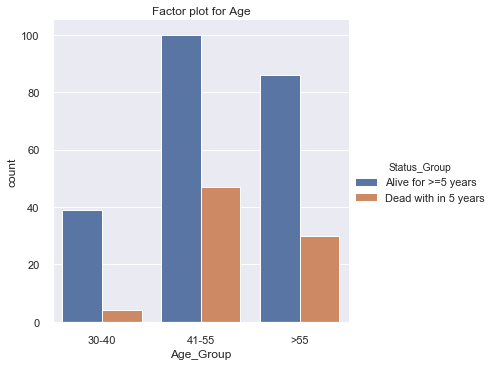

In [55]:
sns.catplot('Age_Group', hue='Status_Group', kind='count', data=breast_cancer);
plt.title('Factor plot for Age')

### 4.3.4 Age Group vs Status Group - Subplots to calculate the percentage of surviving patients based on Age <br id=section40304></br>

Text(0.5, 1.0, 'Old')

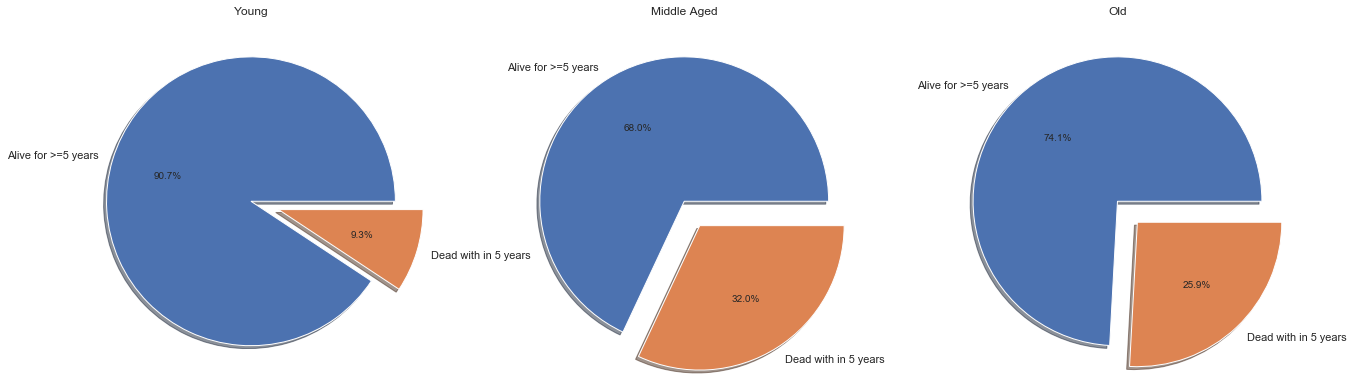

In [56]:
f,ax = plt.subplots(1,3,figsize=(22,7))
breast_cancer['Status_Group'][breast_cancer['Age_Group'] == '30-40'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Age_Group'] == '41-55'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Age_Group'] == '>55'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,label=" ")
ax[0].set_title('Young')
ax[1].set_title('Middle Aged')
ax[2].set_title('Old')

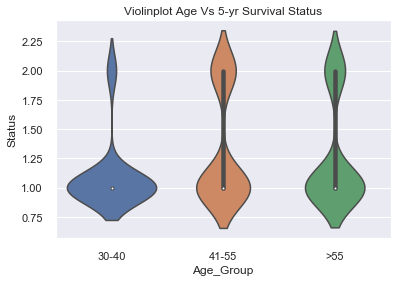

In [57]:
sns.violinplot('Age_Group','Status', kind='point', data = breast_cancer)
plt.title('Violinplot Age Vs 5-yr Survival Status')
plt.show()

#### Observations: The above analysis clearly shows that the younger patients with age upto 40 years had a 91% chance of survival beyond 5 years while the for the population higher than 40 years the survival rate for more than 5 years reduced to 68-74 % only. 

### 4.3.5 Correlation Analysis for Age and 5-year Survival Status <br id=section40305></br>

In [58]:
df_age = pd.DataFrame({'Status': breast_cancer['Status'], 'Age': breast_cancer['Age']})        
df_age.corr()
print("Pearson:",df_age.corr())

Pearson:          Status      Age
Status  1.00000  0.06795
Age     0.06795  1.00000


#### The above correlation is between the unsegmented data and shows a very weak correlation. 

In [59]:
df_age2 = pd.DataFrame({'Status': breast_cancer['Status_Group'], 'Age': breast_cancer['Age_Group']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_age2_num = df_age2.apply(lambda x: x.cat.codes)

print("Pearson:", df_age2_num.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:           Status       Age
Status  1.000000  0.072705
Age     0.072705  1.000000



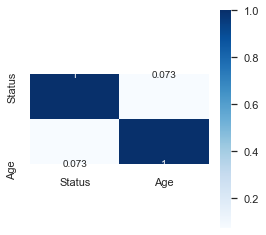

In [60]:
features = df_age2_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

#### Even though the pie chart analysis shows that the survival rate beyond 5 years decreased with age, the correlation co-efficient between Age and Survival Status even with the segmented data is very low. It could be because the surivival rate goes up in the third group and because of that the correlation co-efficient has decreased.  To check this hypothesis, the above analysis will be repeated with only two Age groups - 30-40 and >40 years. 

### 4.3.6 Re-analysis based on segmentation of data based on Age in only two groups : 30-40 and >40 <br id=section40306></br>

In [61]:
breast_cancer['Age_Group2'] = pd.cut(breast_cancer['Age'],
                         [30,40,99],
                         labels=['30-40','>40'],include_lowest=True)

Text(0.5, 1.0, 'Old')

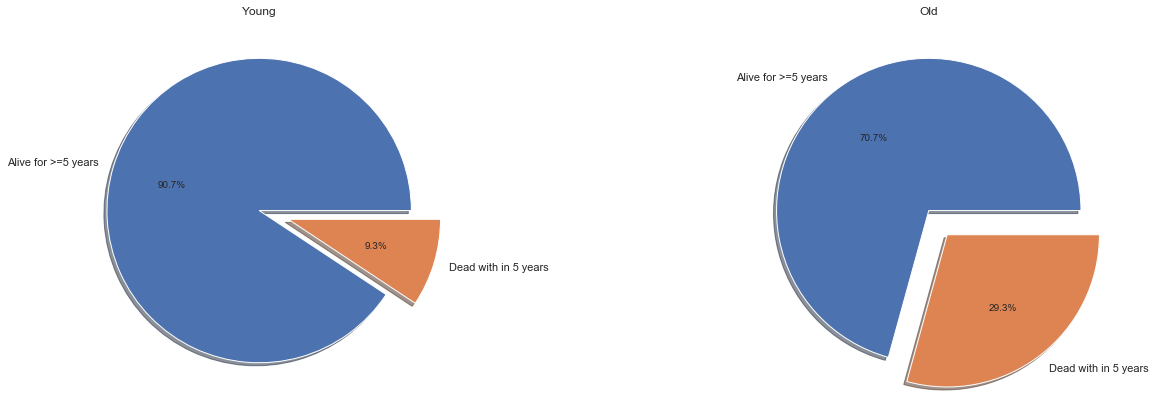

In [62]:
f,ax = plt.subplots(1,2,figsize=(22,7))
breast_cancer['Status_Group'][breast_cancer['Age_Group2'] == '30-40'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Age_Group2'] == '>40'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
ax[0].set_title('Young')
ax[1].set_title('Old')

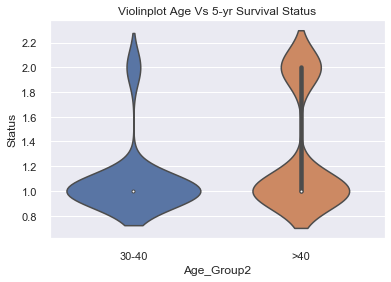

In [63]:
sns.violinplot('Age_Group2','Status', kind='point', data = breast_cancer)
plt.title('Violinplot Age Vs 5-yr Survival Status')
plt.show()

#### Observations:  The above subplot re-analysis confirms that the 5 year survival rate of patients in the age group 30-40 years is ~90% and reduces to 70%  in patients with age  >40 years.

In [64]:
df_age3 = pd.DataFrame({'Status': breast_cancer['Status_Group'], 'Age': breast_cancer['Age_Group2']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_age3_num = df_age3.apply(lambda x: x.cat.codes)

print("Pearson:", df_age3_num.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:           Status       Age
Status  1.000000  0.157351
Age     0.157351  1.000000



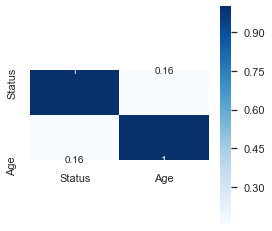

In [65]:
features = df_age3_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

####  Observation: In the correlation analysis using the segmented data based on only 2 categories of Age group (30-40 and >40 years), the correlation co-efficient doubles. Athough the result improves compared to the previous analysis (based on data with three categores of Age Group : 30-40, 41-55 and >55), the correlation is still weaker than the correlation between number of positive axillary nodes and 5-year survival status.

### 4.4 Analysis based on Years of Operation <br id=section404></br>

### 4.4.1 Understanding distribution of Years of Operation in the data <br id=section40401></br>

In [66]:
breast_cancer.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [67]:
max_rows_pos69=breast_cancer.apply(lambda x: True if x['Years_of_operation'] == 69  else False , axis=1)

In [68]:
len(max_rows_pos69[max_rows_pos69 == True].index)

11

In [69]:
max_rows_pos58=breast_cancer.apply(lambda x: True if x['Years_of_operation'] == 58  else False , axis=1)

In [70]:
len(max_rows_pos58[max_rows_pos58 == True].index)

36

In [71]:
max_rows_pos63=breast_cancer.apply(lambda x: True if x['Years_of_operation'] >= 63  else False , axis=1)

In [72]:
len(max_rows_pos63[max_rows_pos63 == True].index)

166

In [73]:
max_rows_60=breast_cancer.apply(lambda x: True if x['Years_of_operation'] > 60  else False , axis=1)

In [74]:
len(max_rows_60[max_rows_60 == True].index)

215

In [75]:
max_rows_65=breast_cancer.apply(lambda x: True if x['Years_of_operation'] > 65  else False , axis=1)

In [76]:
len(max_rows_65[max_rows_65 == True].index)

77

### Distribution profile of Years of Operation

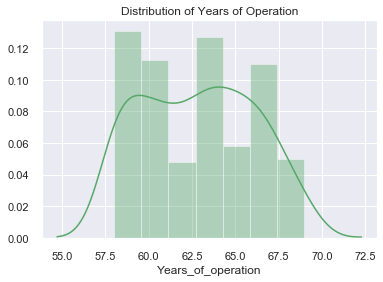

In [77]:
sns.distplot(breast_cancer['Years_of_operation'], color ='g')
plt.title('Distribution of Years of Operation')
plt.show()

#### Observation: The data is for patients who were operated between 1958 to 1969. ~50% (140) operations were done before 1963 and the remaining(166) were done in or after 1963.

### 4.4.2 Segmenting data based on Years of Operation into three categories : 1958-1960, 1961-65 and >1965 <br id=section40402></br>
The logic behind segmenting data in these three categories is to understand if there was any improvement in 5-year survival status due to any changes/improvement in surgerical techniques/protocols in  1950s vs 1961-65 vs after 1965. 

In [78]:
breast_cancer['Years_Group'] = pd.cut(breast_cancer['Years_of_operation'],
                         [58,60,65,99],
                         labels=['1958-1960','1961-65','>1965'],include_lowest=True)

In [79]:
breast_cancer.head(20)

,Age,Years_of_operation,Pos_axillary_nodes,Status,Status_Group,Nodes_Group,Nodes_Group2,Age_Group,Age_Group2,Years_Group
0,30,64,1,1,Alive for >=5 years,1-5,0-10,30-40,30-40,1961-65
1,30,62,3,1,Alive for >=5 years,1-5,0-10,30-40,30-40,1961-65
2,30,65,0,1,Alive for >=5 years,0,0-10,30-40,30-40,1961-65
3,31,59,2,1,Alive for >=5 years,1-5,0-10,30-40,30-40,1958-1960
4,31,65,4,1,Alive for >=5 years,1-5,0-10,30-40,30-40,1961-65
5,33,58,10,1,Alive for >=5 years,>5,0-10,30-40,30-40,1958-1960
6,33,60,0,1,Alive for >=5 years,0,0-10,30-40,30-40,1958-1960
7,34,59,0,2,Dead with in 5 years,0,0-10,30-40,30-40,1958-1960
8,34,66,9,2,Dead with in 5 years,>5,0-10,30-40,30-40,>1965
9,34,58,30,1,Alive for >=5 years,>5,>10,30-40,30-40,1958-1960


### 4.4.3 Years of Operation vs 5-year Survival Status <br id=section40403></br>

Text(0.5, 1, 'Factor plot for Years of operation')

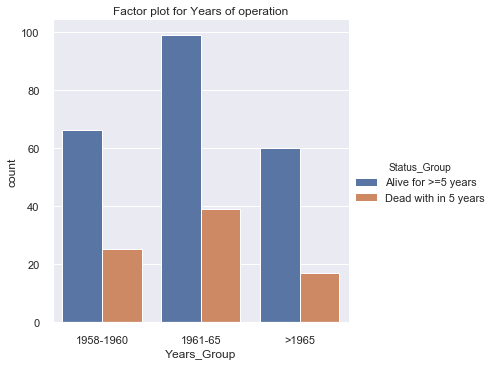

In [80]:
sns.catplot('Years_Group', hue='Status_Group', kind='count', data=breast_cancer);
plt.title('Factor plot for Years of operation')

### 4.4.4 Years of Operation vs 5-year Survival Status - Subplots to calculate the percentage of surviving patients based on Years of Operation <br id=section40404></br>

Text(0.5, 1.0, 'After 1965')

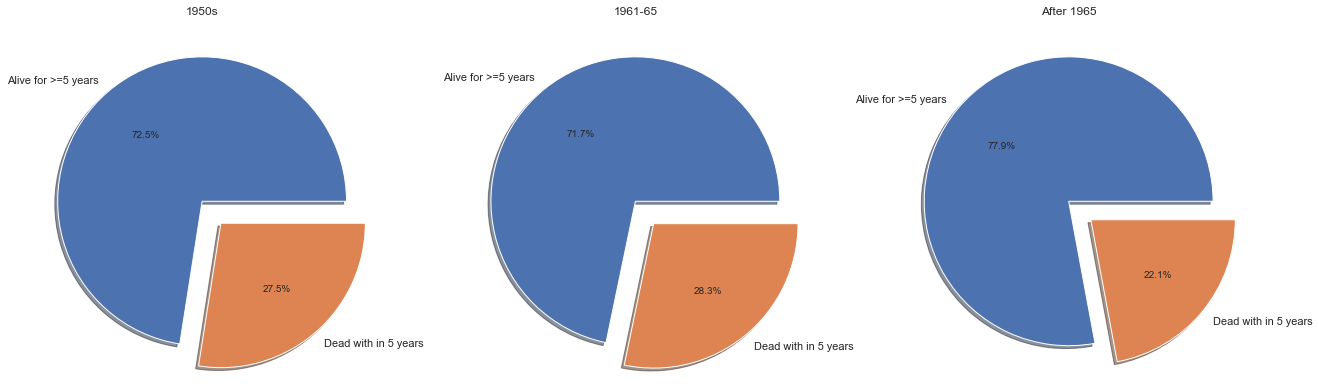

In [81]:
f,ax = plt.subplots(1,3,figsize=(22,7))
breast_cancer['Status_Group'][breast_cancer['Years_Group'] == '1958-1960'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Years_Group'] == '1961-65'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Years_Group'] == '>1965'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,label=" ")
ax[0].set_title('1950s')
ax[1].set_title('1961-65')
ax[2].set_title('After 1965')

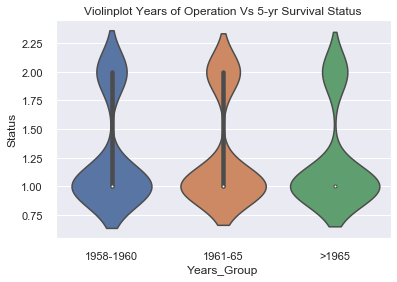

In [82]:
sns.violinplot('Years_Group','Status', kind='point', data = breast_cancer)
plt.title('Violinplot Years of Operation Vs 5-yr Survival Status')
plt.show()

#### Observation:  Based on the above subplots, there is no visible difference in the 5-year survival of patients in different groups based on Years of operation.  However, there is a 6% increase in survival in patients who were operated after 1965 (78%) as compared to the group of patients operated from 1958 to 1960 (72%). 

### 4.4.5 Correlation analysis for Years of Operation and 5-year survival status <br id=section40405></br>

In [83]:
df_years1 = pd.DataFrame({'Status': breast_cancer['Status'], 'Years of Operation': breast_cancer['Years_of_operation']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_years1_num = df_years1.apply(lambda x: x.cat.codes)

print("Pearson:", df_years1_num.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:                       Status  Years of Operation
Status              1.000000           -0.004768
Years of Operation -0.004768            1.000000



In [84]:
df_years2 = pd.DataFrame({'Status': breast_cancer['Status'], 'Years of Operation': breast_cancer['Years_Group']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_years2_num = df_years2.apply(lambda x: x.cat.codes)

print("Pearson:", df_years2_num.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:                       Status  Years of Operation
Status              1.000000           -0.043011
Years of Operation -0.043011            1.000000



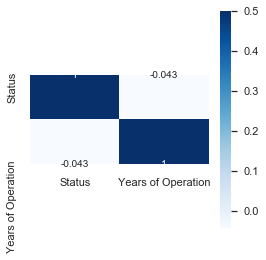

In [85]:
features = df_years2_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=0.5,square=True,annot=True,cmap='Blues')
plt.show()

#### Observation:  There is almost no correlation between years of operation and 5-year survival status of patients.  However, on using the segmented data based on Years of operation, there seems to a very weak neative correlation between the Years of operation vs 5-year survival status of patients indicating that as the number of years increase, the number of patients with smaller value of Status (category1) increases. Patients under category 1 are those patients who have survived beyond 5 years.

### 4.5 Pair Plot <br id=section405></br>

Text(0.5, 1, 'Pair Plot')

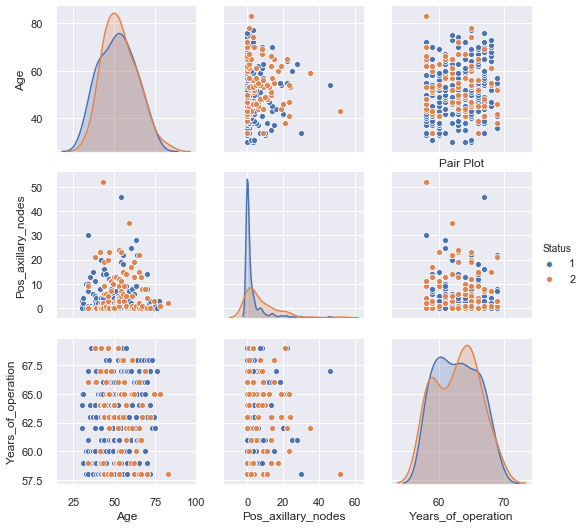

In [86]:
sns.pairplot(breast_cancer[["Age","Pos_axillary_nodes","Years_of_operation","Status"]],vars = ["Age", "Pos_axillary_nodes","Years_of_operation"], hue="Status")
plt.title('Pair Plot')

#### Observations: 
#### 1. Patients in the age group 41-55 years have a higher 5-year death rate. This reaffirms the analysis done in section 4.3.4
#### 2. Patients with 0 to 10 positive axillary nodes have a much higher rate of survival than the patients with more than 10 positive axillary nodes (blue peak is much higher than orange peak), which reaffirms the analysis done in section 4.2.4
#### 3. Patients who were operated upon from 1963 to 1965 seem to have a higher 5-year death rate.

### 4.5.1 Re-analysis based on the insights from Pair plot 
Segmentation based on Years of Operation into 4 categores : 1958-1960, 1961-62, 1963-1965, >1965 
<br id=section40501></br>

In [87]:
breast_cancer['Years_Group2'] = pd.cut(breast_cancer['Years_of_operation'],
                         [58,60,62,65,99],
                        labels=['1958-1960','1961-62','1963-65','>1965'],include_lowest=True)

Text(0.5, 1.0, '>1965')

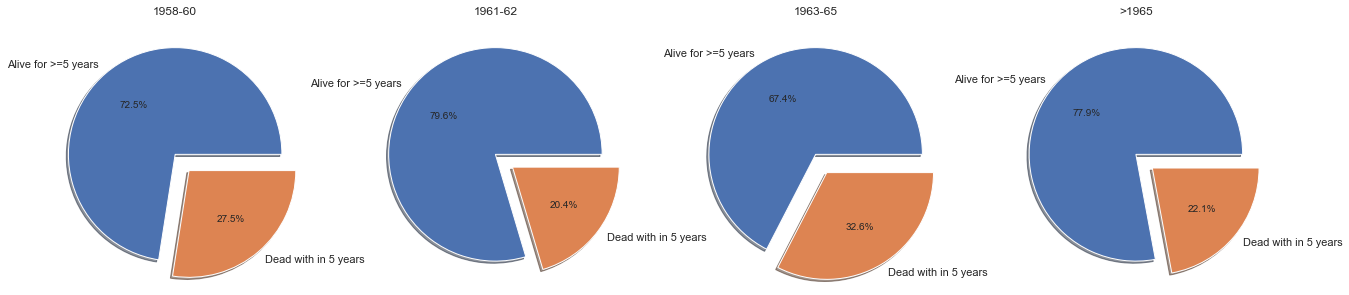

In [95]:
f,ax = plt.subplots(1,4,figsize=(22,7))
breast_cancer['Status_Group'][breast_cancer['Years_Group2'] == '1958-1960'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Years_Group2'] == '1961-62'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Years_Group2'] == '1963-65'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,label=" ")
breast_cancer['Status_Group'][breast_cancer['Years_Group2'] == '>1965'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True,label=" ")
ax[0].set_title('1958-60')
ax[1].set_title('1961-62')
ax[2].set_title('1963-65')
ax[3].set_title('>1965')

#### Obeservation: Patients who were operated between 1963-65 had 10-13% less  survivors (68%) beyond 5 years as compared to the patients who were operated in 1961-62 (80%) and after 1965 (78%)

### 5.0 Questions <br is= section5></br>

### 5.1 With in the same age group what is distribution of number of positive nodes and how does it affect the 5-year survival rate in different age groups? <br id=section501></br>

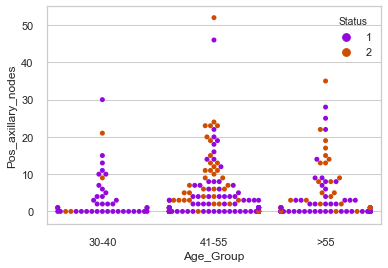

In [182]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x="Age_Group", y="Pos_axillary_nodes", hue="Status", palette="gnuplot", data=breast_cancer)

Text(0.5, 1.0, '>55')

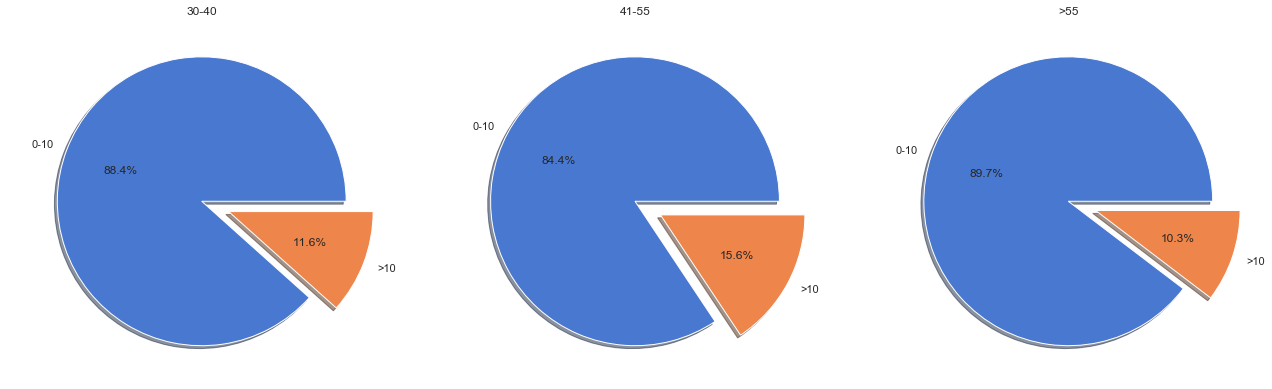

In [183]:
f,ax = plt.subplots(1,3,figsize=(22,7))
breast_cancer['Nodes_Group2'][breast_cancer['Age_Group'] == '30-40'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Nodes_Group2'][breast_cancer['Age_Group'] == '41-55'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
breast_cancer['Nodes_Group2'][breast_cancer['Age_Group'] == '>55'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,label=" ")
#breast_cancer['Nodes_Group2'][breast_cancer['Years_Group2'] == '>1965'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True,label=" ")
ax[0].set_title('30-40')
ax[1].set_title('41-55')
ax[2].set_title('>55')
#ax[3].set_title('After 1965')

Text(0.5, 1.0, '>40')

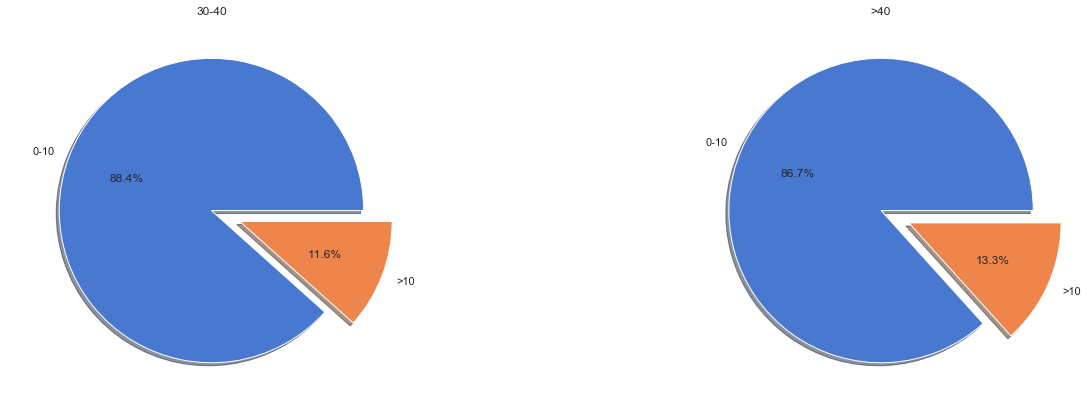

In [184]:
f,ax = plt.subplots(1,2,figsize=(22,7))
breast_cancer['Nodes_Group2'][breast_cancer['Age_Group2'] == '30-40'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Nodes_Group2'][breast_cancer['Age_Group2'] == '>40'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
#breast_cancer['Nodes_Group2'][breast_cancer['Age_Group'] == '>55'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,label=" ")
#breast_cancer['Nodes_Group2'][breast_cancer['Years_Group2'] == '>1965'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True,label=" ")
ax[0].set_title('30-40')
ax[1].set_title('>40')
#ax[2].set_title('>55')
#ax[3].set_title('After 1965')

#### Observations: 
#### 1.From the above analysis it is clear that a high % (91% - from section 4.3.4) of 5 year survival rate in the age group 30-40 years is not because of higher number of patients with low number positive axillary nodes. As is seen in above sub plots, in 30-40 years age group, there are 11.6% patients with >10 positive axillary nodes which is comparable to 13.3 % in patients >40 years of age (5-year survuval rate of 71% - from section 4.3.4) .
#### 2. However, the above plot does explain a ~6% lower 5-year survival rate in 41-55 age group as compared to >55 years old patients since 41-55 year age group had ~5% more patients with >10 positive axillary nodes. 

### 5.2  With in the same node group, what is the distribution of age and does it lead to the difference in the 5-year survival rate between the different nodes groups? <br id=section502></br>

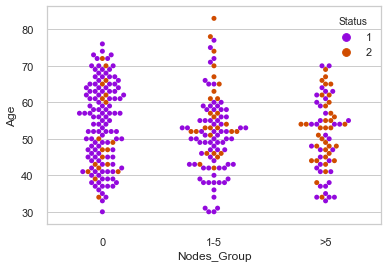

In [96]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x="Nodes_Group", y="Age", hue="Status", palette="gnuplot", data=breast_cancer)

Text(0.5, 1.0, '>5')

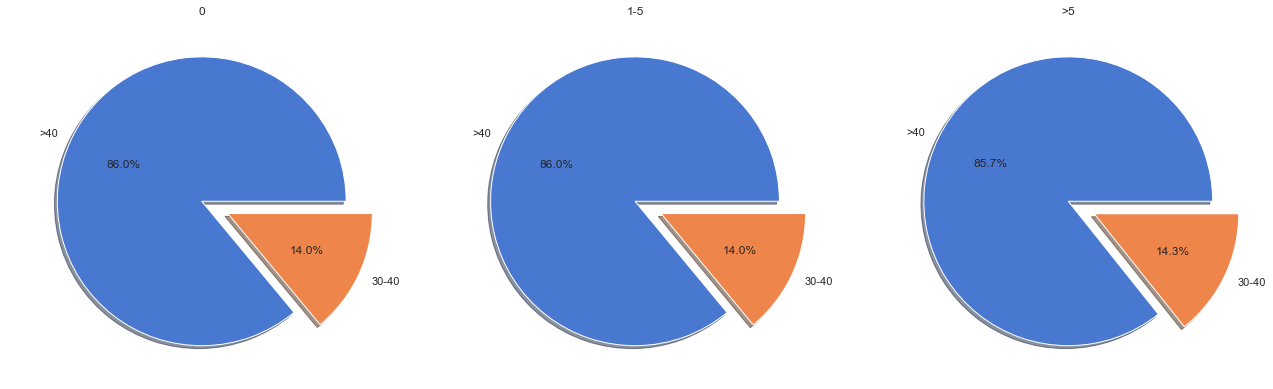

In [186]:
f,ax = plt.subplots(1,3,figsize=(22,7))
breast_cancer['Age_Group2'][breast_cancer['Nodes_Group'] == '0'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Age_Group2'][breast_cancer['Nodes_Group'] == '1-5'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
breast_cancer['Age_Group2'][breast_cancer['Nodes_Group'] == '>5'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,label=" ")
#breast_cancer['Nodes_Group2'][breast_cancer['Years_Group2'] == '>1965'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True,label=" ")
ax[0].set_title('0')
ax[1].set_title('1-5')
ax[2].set_title('>5')
#ax[3].set_title('After 1965')

#### Observations: It is clear from the above analysis that the three nodes group have a similar % of old and young population, hence a higher 5-year survival rate in the population with zero positve axillary nodes (86% - from section 4.2.4 ) is not because of a higher number of younger patients in that group.

### 5.3 Is the higher 5-year death rate for patients operated between 1963-65 due to a higher number of positive axillary nodes in that group of patients and/or due to higher number of older patients? <br id=section503></br>

Text(0.5, 1, 'Years of operation distribution using FacetGrid')

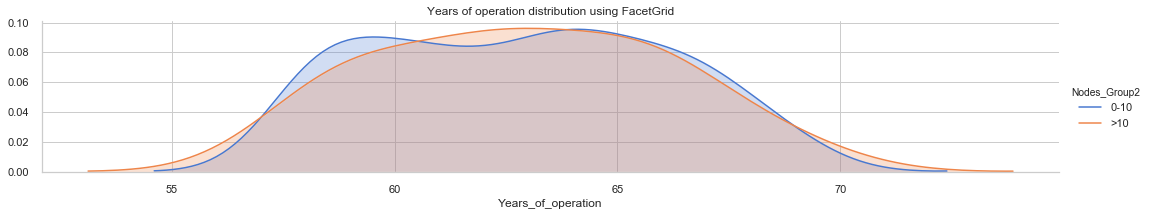

In [187]:
as_fig = sns.FacetGrid(breast_cancer,hue='Nodes_Group2',aspect=5)

as_fig.map(sns.kdeplot,'Years_of_operation',shade=True)

#oldest = breast_cancer['Years_of_operation'].max()

#as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Years of operation distribution using FacetGrid')

Text(0.5, 1.0, 'After 1965')

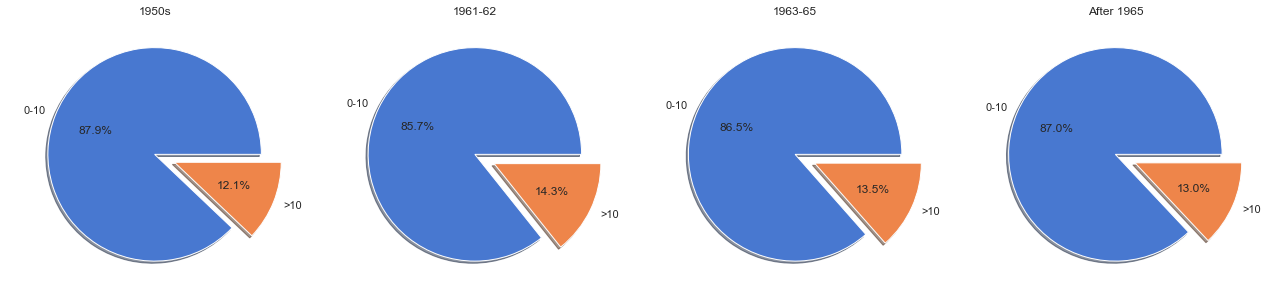

In [188]:
f,ax = plt.subplots(1,4,figsize=(22,7))
breast_cancer['Nodes_Group2'][breast_cancer['Years_Group2'] == '1958-1960'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Nodes_Group2'][breast_cancer['Years_Group2'] == '1961-62'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
breast_cancer['Nodes_Group2'][breast_cancer['Years_Group2'] == '1963-65'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,label=" ")
breast_cancer['Nodes_Group2'][breast_cancer['Years_Group2'] == '>1965'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True,label=" ")
ax[0].set_title('1950s')
ax[1].set_title('1961-62')
ax[2].set_title('1963-65')
ax[3].set_title('After 1965')

#### Observations: The patients operated between 1963-65 had a similar number of patients with more than 10 positive axillary nodes as compared to the patients operated between 1958-1960, 1961-62 or after 1965. Hence, positive axillary nodes does not explain higher death rate in this group of patients. 

Text(0.5, 1, 'Years of operation distribution using FacetGrid')

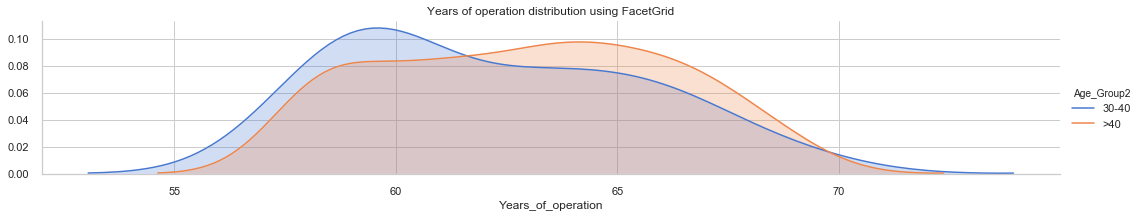

In [189]:
as_fig = sns.FacetGrid(breast_cancer,hue='Age_Group2',aspect=5)

as_fig.map(sns.kdeplot,'Years_of_operation',shade=True)

#oldest = breast_cancer['Years_of_operation'].max()

#as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Years of operation distribution using FacetGrid')

Text(0.5, 1.0, 'After 1965')

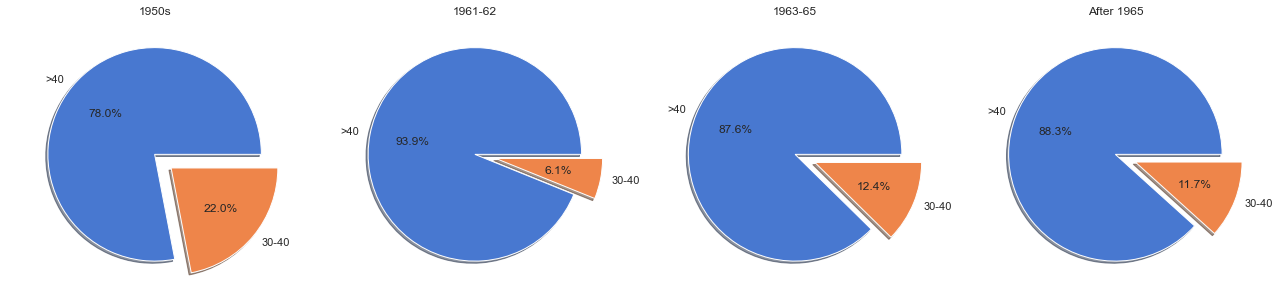

In [190]:
f,ax = plt.subplots(1,4,figsize=(22,7))
breast_cancer['Age_Group2'][breast_cancer['Years_Group2'] == '1958-1960'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,label=" ")
breast_cancer['Age_Group2'][breast_cancer['Years_Group2'] == '1961-62'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,label=" ")
breast_cancer['Age_Group2'][breast_cancer['Years_Group2'] == '1963-65'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True,label=" ")
breast_cancer['Age_Group2'][breast_cancer['Years_Group2'] == '>1965'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True,label=" ")
ax[0].set_title('1950s')
ax[1].set_title('1961-62')
ax[2].set_title('1963-65')
ax[3].set_title('After 1965')

#### Observations: 
#### 1. The patients operated between 1963-65 had a similar number of young and old patients as compared to the patients operated between after 1965. Hence age does not explain a higher 5-year death rate (~33% -from Section 4.5.1) in this group of patients as compared to other years.  
#### 2. Interestingly,  patients operated between 1958-1960, had a higher % of young (30-40years) population (22%) and slightly less number of patients with >10 positive axillary nodes (12%), but still had a higher 5-year death rate (27%) as compared to the population that was operated upon in 1961-62 (20%) as well as those who were operated after 1965 (22%) 

<br id=section6></br>
## 6. Conclusions
- Number of positive axillary nodes is the strongest factor that affect the 5-year survival of breast cancer patients.  Age is the second most important factor that affect the 5-year survival of breast cancer patients:
   - Patients with >10 positive axillary nodes had 2.5 times higher death rate as compared to the patients with < 10 positive axillary nodes
   - Patients below 40 years had 20% higher survival rate as compared to the patients above 40 years
   
- Three different node groups (0, 1-5, >5) had a similar distribution of young and old patients:
   - Higher 5-year survival rate (86%) in the patient group with zero positive axillary nodes was not because of a skewed distribution of younger patients in that group but most likely because of complete removal of cancer cells before the spread of the disease.
   
- Since  distribution of patients with >10 positive axillary nodes was similar among the group of patients below and above 40 years, hence skewed distribution of patients with >10 positive axillary nodes does not explain ~20% higher 5-year survival rate in the young group (below 40 years) of patients:
    - The higher 5-year survival rate was most likely due to a stronger and younger immune system and hence stronger ability to fight and kill cancer cells.

- There has been an increase in the 5-year survival rate in the patients operated after 1965 as compared to the patients operated in 1958-1960:
    - This improvement was not due to a skewed distribution of either younger patients or patients with less number of positive axillary nodes in the group operated after 1965, but most likely due to advancement in medical technology and better surgical techniques.

- There was an increase in the 5-year death rate in the patients operated between 1963-65 - cause unknown.
    

## 6.1 Actionable Insights <br id=section601></br>
- It is critical to detect breast cancer early - before it spreads to the lymph nodes to improve the 5-year survival rate in patients.

- There was no difference in the percentage of patients with >10 positive axillary nodes in the group operated in 1958-1960 versus  the group operated upon after 1965, indicating no improvement in early detection from 1958 to 1969:
    - Increase in the frequency of screening as well as development of more sensitive screening methods are needed to gain an upper hand in this fight.

- It would be good to investigate the reasons for higher 5-year death rate in the patients operated in 1963-65, so that the same is not repeated in the future.

- It is also required to understand the improvement in 5-year survival rate from 1958 to 1960 versus 5-year survival rate after 1965, to narrow down the surgical methods/techniques for technological advancements to improve the survival rate further.